In [41]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [42]:
df = pd.read_csv('data.csv')

In [43]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position
df['Simple Position'] = df.apply(simple_position, axis=1)
df = df.drop(['Position'], axis=1)
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple Position
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,ST
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,ST
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,AM
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,GK
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,MF


Usado esse site (https://simple.wikipedia.org/wiki/List_of_countries_by_continents) para pegar a lista de países por continente e awk para converter a lista em uma lista de python.

In [44]:
south_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
"French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

In [45]:
north_america = ["Anguilla", "Antigua & Barbuda", "Aruba", "Bahamas", "Barbados", "Belize", "Bermuda", "Bonaire", 
                 "British Virgin Islands", "Canada", "Cayman Islands", "Costa Rica", "Cuba", "Curacao", "Dominica",
                 "Dominican Republic", "El Salvador", "Grenada", "Guadeloupe", "Guatemala", "Haiti", "Honduras",
                 "Jamaica", "Martinique", "Mexico", "Montserrat", "Netherlands Antilles", "Nicaragua", "Panama",
                 "Puerto Rico", "Saba", "Saint Kitts and Nevis", "St Lucia", "St Barthelemy", "St Eustatius", 
                 "St Kitts Nevis", "St Vince Grenadines", "St. Martin", "Trinidad & Tobago", "Turks and Caicos Islands", 
                 "United States", "US Virgin Islands"]


In [46]:
europe = ["Aland Islands", "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia Herzegovina",
          "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "England", "Faroe Islands", "Finland", "France",
          "Germany", "Gibraltar", "Greece", "Greenland", "Guernsey", "Hungary", "Iceland", "Ireland", "Isle of Man", "Kosovo",
          "Italy", "Jersey", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "FYR Macedonia", "Malta", "Moldova",
          "Monaco", "Montenegro", "Netherlands", "Northern Ireland", "Norway", "Poland", "Portugal", "Republic of Ireland", "Romania", "Russia", "San Marino", "Scotland",
          "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
          "Vatican City State", "Wales"]

In [47]:
oceania = ["Australia", "Federated States of Micronesia", "Fiji", "Guam", "Kiribati", "Marshall Islands", "Nauru", "New Caledonia",
           "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]

In [48]:
africa = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", 
          "Central African Rep.", "Chad", "Comoros", "Congo", "DR Congo",
          "Ivory Coast", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon", "Gambia", 
          "Ghana", "Guinea", "Guinea Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
          "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
          "São Tomé & Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
          "Sudan", "Swaziland", "Tanzania", "Togo", "Tunisia", "Uganda", "Western Sahara", "Zambia", "Zimbabwe"]

In [49]:
asia = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China PR",
        "Cyprus", "East Timor", "Georgia", "Hong Kong", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", 
        "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan" "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", 
        "Myanmar", "Nepal", "Korea DPR", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia",
        "Singapore", "Korea Republic", "Sri Lanka", "Syria", "Taiwan (Republic of China)", "Tajikistan", "Thailand",
        "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]

In [50]:
def get_continent(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in south_america:
        return "South America"
    elif country in north_america:
        return "North America"
    elif country in africa:
        return "Africa"
    elif country in oceania:
        return "Oceania"
    else:
        return "Other"

In [51]:
df['Continent'] = df['Nationality'].apply(lambda x: get_continent(x))

In [52]:
df[df['Continent'] == 'Other']

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple Position,Continent


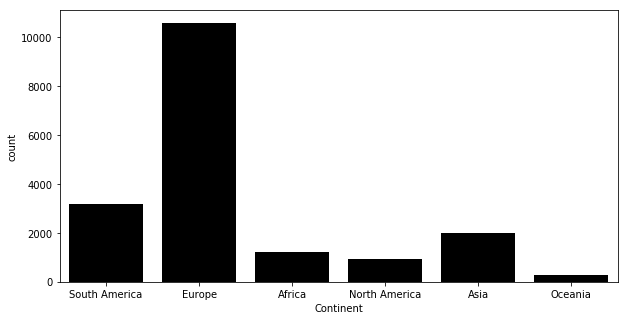

In [53]:
# Dataset é desbalanceado: Europa possui muito mais jogadores.
plt.figure(figsize=(10,5))
sns.countplot(x="Continent", data=df, color='k')
plt.show()

In [54]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club',
               'Preferred Foot', 'Work Rate', 'Nationality'], axis = 1)
df = df.dropna()

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(df['Continent'])
X = df.drop(["Continent"], axis=1)
X = pd.get_dummies(X)

X = X.values

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [57]:
# Rebalanceando as classes
import imblearn
from imblearn.over_sampling import SMOTE

n_classes = len(list(set(y)))

for _ in range(n_classes):
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)

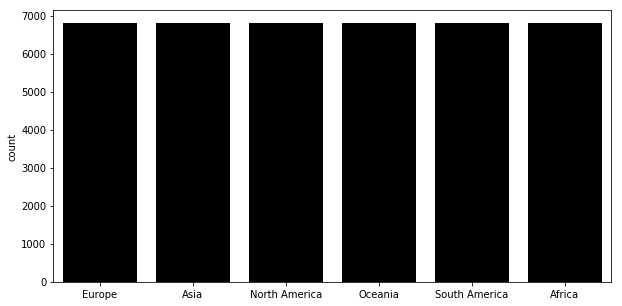

In [58]:
plot = list(le.inverse_transform(y_train))

plt.figure(figsize=(10,5))
sns.countplot(x=plot, color='k')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [60]:
fold = 0
melhores = []
for train_index, valid_index in skf.split(X_new_train, y_train):
    X_tt = X_new_train[train_index]
    y_tt = y_train[train_index]
    X_v = X_new_train[valid_index]
    y_v = y_train[valid_index]
    
    best = (0, 0)
    for nn in [2, 3, 4, 5]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best[0]:
            best = (accuracy, nn)
    
    melhores.append(best[1])
    fold += 1
    print('Fold-{}, melhor n = {}, acc = {}'.format(fold, best[1], best[0]))

Fold-1, melhor n = 2, acc = 0.8450635386119257
Fold-2, melhor n = 2, acc = 0.8396965247185512
Fold-3, melhor n = 2, acc = 0.8445912873225648
Fold-4, melhor n = 2, acc = 0.842143906020558
Fold-5, melhor n = 2, acc = 0.8426333822809594
Fold-6, melhor n = 2, acc = 0.8450807635829662
Fold-7, melhor n = 2, acc = 0.8519334312285854
Fold-8, melhor n = 2, acc = 0.8489965736661772
Fold-9, melhor n = 2, acc = 0.8450807635829662
Fold-10, melhor n = 2, acc = 0.8396965247185512


In [61]:
# usando a media e o desvio padrão do treino para converter o teste

In [62]:
print(np.median(melhores))

2.0


Como desejamos mantes os dados que possuimos, usaremos uma técnica de over-sampling, ou seja, vamos criar novos dados a partir daqueles que já estão no dataset. Assim, escolhemos usar a técnica SMOTE para criar novos samples aletoriamente.

In [64]:
from sklearn.metrics import classification_report

melhor = round(np.median(melhores))
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_new_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [65]:
# usando a media e o desvio padrão do treino para converter o teste
(X_test - X_train.mean()) / X_train.std(ddof=1)
X_test_new = scaler.transform(X_test)
print(classification_report(y_test, model.predict(X_test_new)))

              precision    recall  f1-score   support

           0       0.11      0.38      0.17       181
           1       0.17      0.32      0.22       336
           2       0.63      0.30      0.41      1704
           3       0.10      0.25      0.15       163
           4       0.04      0.08      0.05        48
           5       0.23      0.16      0.19       517

    accuracy                           0.28      2949
   macro avg       0.21      0.25      0.20      2949
weighted avg       0.44      0.28      0.31      2949



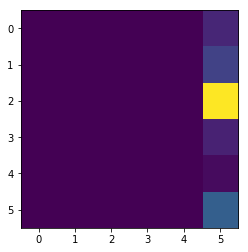

In [71]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))